In [1]:
#importing libraries
import pandas as pd
import os

In [2]:
os.chdir("D:\FreshCatch")

In [3]:
data=pd.read_csv("order_export1.csv")
print(data.shape)
data.info()

(5668, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         5668 non-null   object 
 1   Email                        5656 non-null   object 
 2   Financial Status             3099 non-null   object 
 3   Paid at                      3077 non-null   object 
 4   Fulfillment Status           3099 non-null   object 
 5   Accepts Marketing            3099 non-null   object 
 6   Subtotal                     3099 non-null   float64
 7   Shipping                     3099 non-null   float64
 8   Taxes                        3099 non-null   float64
 9   Total                        3099 non-null   float64
 10  Discount Amount              3099 non-null   float64
 11  Shipping Method              2913 non-null   object 
 12  Created at                   5668 non-null   object 
 13  Lineite

In [6]:
data=data.rename(columns={'Lineitem quantity':"No.of items"})

## I am going to answer these following Questions

### 1.which month has maximum orders
### 2. which day has maximum orders
### 3.which day of the week has most orders
### 4. is there any relation ship between email marketing and shiping mode 
### 5. which  item is most order
### 6.which city has maximum orders
### 7. which State has maimum orders
### 8. which city spent maximum amount
### 9. which State spent maximum amount

In [7]:
#only oder date and state city and no.of items will take for calculation
data1=data[['Created at','State','City','No.of items']]
data1.iloc[100:105]

,Created at,State,City,No.of items
100,2022-09-01 19:12:29 +0530,Tamil Nadu,TIRUVALLUR,1
101,2022-09-01 19:12:29 +0530,Tamil Nadu,TIRUVALLUR,1
102,2022-09-01 18:15:26 +0530,Tamil Nadu,Salem,1
103,2022-09-01 17:50:27 +0530,Karnataka,BANGALORE,1
104,2022-09-01 17:50:27 +0530,Karnataka,BANGALORE,1


In [8]:
#converting object to datetime 
data1['Created at']=pd.to_datetime(data['Created at'])

C:\Users\nagam\AppData\Local\Temp\ipykernel_22060\3855818496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Created at']=pd.to_datetime(data['Created at'])


In [9]:
#extracting the month and adding new column to data set
data1['month']=data1['Created at'].dt.month
data1.head(5)

C:\Users\nagam\AppData\Local\Temp\ipykernel_22060\2678216071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month']=data1['Created at'].dt.month


,Created at,State,City,No.of items,month
0,2022-09-04 19:31:19+05:30,Tamil Nadu,MADURAI,1,9
1,2022-09-04 16:37:56+05:30,Tamil Nadu,Tirunelveli,1,9
2,2022-09-04 15:29:29+05:30,Tamil Nadu,Tirunelveli,1,9
3,2022-09-04 15:01:16+05:30,Karnataka,BANGALORE,1,9
4,2022-09-04 11:39:32+05:30,Karnataka,BANGALORE,1,9


In [10]:
#Extract the day  and adding new column to data set
data1['day']=data1['Created at'].dt.day
data1.head(5)

C:\Users\nagam\AppData\Local\Temp\ipykernel_22060\337517829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['day']=data1['Created at'].dt.day


,Created at,State,City,No.of items,month,day
0,2022-09-04 19:31:19+05:30,Tamil Nadu,MADURAI,1,9,4
1,2022-09-04 16:37:56+05:30,Tamil Nadu,Tirunelveli,1,9,4
2,2022-09-04 15:29:29+05:30,Tamil Nadu,Tirunelveli,1,9,4
3,2022-09-04 15:01:16+05:30,Karnataka,BANGALORE,1,9,4
4,2022-09-04 11:39:32+05:30,Karnataka,BANGALORE,1,9,4


In [11]:
#To check the which month is hihgest number of orders 
data1.groupby('month')['No.of items'].count().reset_index().sort_values(by=['No.of items'],ascending=False)

,month,No.of items
3,4,901
6,7,838
5,6,826
2,3,717
7,8,704
4,5,672
1,2,645
0,1,240
8,9,125


### Aprile month has maximum orders

In [12]:
#to see which day is most orders
data1.groupby('day')['No.of items'].count().reset_index().sort_values(by=['No.of items'],ascending=False)

,day,No.of items
24,25,239
11,12,234
1,2,224
25,26,223
21,22,219
15,16,217
6,7,213
17,18,212
23,24,206
22,23,206


### 20 to 25 of every month has maximum orders

In [13]:
#to extract the name of the day and add new column to data
data1['DayName']=data1['Created at'].dt.day_name()

C:\Users\nagam\AppData\Local\Temp\ipykernel_22060\703785123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['DayName']=data1['Created at'].dt.day_name()


In [14]:
data1.head(5)

,Created at,State,City,No.of items,month,day,DayName
0,2022-09-04 19:31:19+05:30,Tamil Nadu,MADURAI,1,9,4,Sunday
1,2022-09-04 16:37:56+05:30,Tamil Nadu,Tirunelveli,1,9,4,Sunday
2,2022-09-04 15:29:29+05:30,Tamil Nadu,Tirunelveli,1,9,4,Sunday
3,2022-09-04 15:01:16+05:30,Karnataka,BANGALORE,1,9,4,Sunday
4,2022-09-04 11:39:32+05:30,Karnataka,BANGALORE,1,9,4,Sunday


In [15]:
#To see which day has most orders
ex2=data1.groupby('DayName').count().sort_values(by=['day'],ascending=False)
ex2

,Created at,State,City,No.of items,month,day
DayName,,,,,,
Friday,1506,1506,1506,1506,1506,1506
Saturday,1225,1225,1225,1225,1225,1225
Thursday,908,908,908,908,908,908
Tuesday,742,741,741,742,742,742
Monday,606,598,598,606,606,606
Wednesday,468,464,464,468,468,468
Sunday,213,213,213,213,213,213


### Friday has most orders

### to check how many of them accept  email marketing 

In [17]:

data2=data[['City','State','Email Marketing','No.of items','Shipping Method']]
data2.head(2)

,City,State,Email Marketing,No.of items,Shipping Method
0,MADURAI,Tamil Nadu,yes,1,Free Shipping
1,Tirunelveli,Tamil Nadu,yes,1,Standard Shipping


In [18]:
#to check Accepts is there any relation Marketing and Shipping Method 
exa3=data2.groupby(['Email Marketing','Shipping Method'])['No.of items'].count().reset_index()
exa3

,Email Marketing,Shipping Method,No.of items
0,no,Free Shipping,101
1,no,Standard Shipping,39
2,yes,Free Shipping,1792
3,yes,Standard Shipping,980


In [19]:
from matplotlib import pyplot as plt
import seaborn as sns    

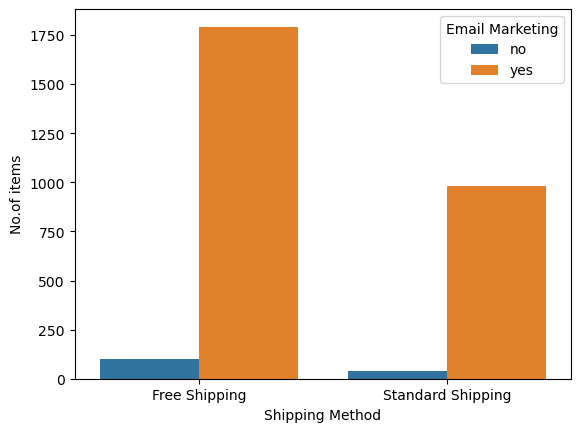

In [21]:
sns.barplot(data=exa3,x='Shipping Method',y='No.of items',hue='Email Marketing');

### most of them acdept free shiping and email marketing 

### which products are most sold

In [55]:
exa5=data[['Lineitem name',"No.of items",'City']]
exa5.groupby(['Lineitem name'])['No.of items'].count().reset_index().sort_values(by=['No.of items'],ascending=False)

,Lineitem name,No.of items
67,Sardine (Chaalai) / Cleaned,414
52,Medium Sized Prawn / Deshelled Deveined,403
2,Anchovy | Nethili,384
84,Small Sized Prawns,326
76,Seer Fish Slices | Vanjaram,273
...,...,...
50,Medium Size Silver Pomfret,2
49,Medium Size Seer Fish (Vanjaram) - 500 gms / U...,1
47,Medium Pomfret (Black) - 500 gms / Cleaned and...,1
7,Big Size Emperor Fish - 500 gms / Cleaned and ...,1


In [26]:
ex4=data[['City','No.of items','State']]
ex4.head(4)

,City,No.of items,State
0,MADURAI,1,Tamil Nadu
1,Tirunelveli,1,Tamil Nadu
2,Tirunelveli,1,Tamil Nadu
3,BANGALORE,1,Karnataka


### city wise total oders

In [27]:
ex4.groupby(['City']).count().reset_index().sort_values(by=['No.of items'],ascending=False)

,City,No.of items,State
5,BANGALORE,1371,1371
28,Madurai,939,939
111,Coimbatore,609,609
11,Chennai,462,462
63,Salem,431,431
...,...,...,...
67,Shengottai,1,1
70,Srirangam,1,1
72,Sulur,1,1
82,Thiru Nagar,1,1


### BANGALORE	 has maximum orders

### state wise total orders

In [28]:
ex4.groupby(['State']).count().reset_index().sort_values(by=['No.of items'],ascending=False)

,State,City,No.of items
5,Tamil Nadu,4191,4191
2,Karnataka,1383,1383
4,Puducherry,58,58
1,Andaman and Nicobar Islands,18,18
0,0,3,3
3,Odisha,2,2


### Tamil Nadu has maximum orders

###  city and state wise total spent

In [29]:
ex5=data[['City','State','Total']]

In [30]:
ex5.groupby(['City']).sum().reset_index().sort_values(by=['Total'],ascending=False)

,City,Total
5,BANGALORE,621070.6
28,Madurai,460943.0
111,Coimbatore,282897.0
11,Chennai,225511.2
63,Salem,195025.0
...,...,...
70,Srirangam,280.0
72,Sulur,280.0
29,Madurai,255.0
82,Thiru Nagar,170.0


### BANGALORE  spent more money

In [31]:
ex5.groupby(['State']).sum().reset_index().sort_values(by=['Total'],ascending=False)

,State,Total
5,Tamil Nadu,2067400.0
2,Karnataka,629698.1
4,Puducherry,28743.0
1,Andaman and Nicobar Islands,26405.0
0,0,1350.0
3,Odisha,1325.0


### Tamil Nadu spent more money

## Thank YOu